In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from fuzzywuzzy import fuzz
from fuzzywuzzy import process

import warnings


In [2]:
# To view all the 81 columns in the data frame, use the set_option to display
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Download the data from Instacart Market Analysis website - 
### https://www.instacart.com/datasets/grocery-shopping-2017

In [3]:
# Load all the InstaCart CSVs into respective dataframes
product_df = pd.read_csv('./Sample/products.csv')
aisles_df = pd.read_csv('./Sample/aisles.csv')
dept_df = pd.read_csv('./Sample/departments.csv')
ord_prod_train_df = pd.read_csv('./Sample/order_products__train.csv')
ord_prod_prior_df = pd.read_csv('./Sample/order_products__prior.csv')
orders_df = pd.read_csv('./Sample/orders.csv')

In [4]:
#  display the shape of the dataframes
print('Shape of products_df = ',product_df.shape, '; Number of Products - ',product_df.shape[0])
print('Shape of aisles_df = ',aisles_df.shape, '; Number of Aisles - ',aisles_df.shape[0])
print('Shape of dept_df = ',dept_df.shape, '; Number of Departments - ',dept_df.shape[0])
print('Shape of ord_prod_train_df = ',ord_prod_train_df.shape, '; Number of Orders listed in Train DF - ',ord_prod_train_df.shape[0])
print('Shape of ord_prod_prior_df = ',ord_prod_prior_df.shape, '; Number of Orders listed in Prior Orders DF - ',ord_prod_prior_df.shape[0])
print('Shape of orders_df = ',orders_df.shape, '; Number of Orders - ',orders_df.shape[0])


Shape of products_df =  (49688, 4) ; Number of Products -  49688
Shape of aisles_df =  (134, 2) ; Number of Aisles -  134
Shape of dept_df =  (21, 2) ; Number of Departments -  21
Shape of ord_prod_train_df =  (1384617, 4) ; Number of Orders listed in Train DF -  1384617
Shape of ord_prod_prior_df =  (32434489, 4) ; Number of Orders listed in Prior Orders DF -  32434489
Shape of orders_df =  (3421083, 7) ; Number of Orders -  3421083


## EDA and Pre-processing Instacart Datasets

### Review data from each of the data frame

In [5]:
# first 3 rows of the dataframe
orders_df.head(3)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0


In [6]:
product_df.head(3)

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7


In [7]:
ord_prod_prior_df.head(3)

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0


## Merge Prior Orders with Products, Orders, Departments and Aisles

In [8]:
# To get the analysis going, we need to join PRIOR orders with Orders, Products 
# to get list of products from previous orders, also combine department and aisle details

Order_Prod_Prior_link_df = (ord_prod_prior_df 
                                .merge(product_df, on="product_id")
                                .merge(orders_df, on="order_id") 
                                .merge(dept_df, on="department_id")
                                .merge(aisles_df, on="aisle_id")                             
                        )



In [9]:
Order_Prod_Prior_link_df.shape

(32434489, 15)

In [10]:
Order_Prod_Prior_link_df.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,2,33120,1,1,Organic Egg Whites,86,16,202279,prior,3,5,9,8.0,dairy eggs,eggs
1,26,33120,5,0,Organic Egg Whites,86,16,153404,prior,2,0,16,7.0,dairy eggs,eggs
2,120,33120,13,0,Organic Egg Whites,86,16,23750,prior,11,6,8,10.0,dairy eggs,eggs


### Top 10 products that were ordered the most

In [11]:
# Top 10 products that were ordered the most based on previous orders

product_value_counts=Order_Prod_Prior_link_df['product_name'].value_counts().sort_values(ascending=False)

In [12]:
product_value_counts.head(10)

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: product_name, dtype: int64

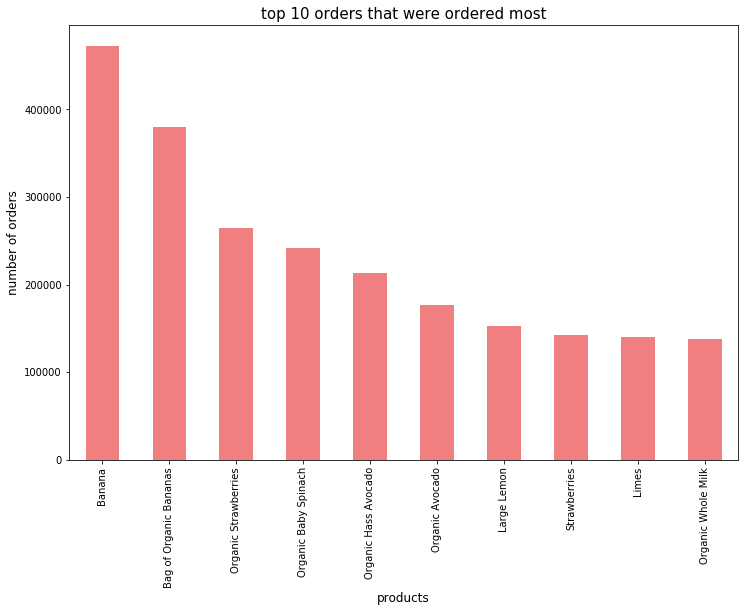

In [13]:
product_value_counts.head(10).plot(kind='bar', color='lightcoral', figsize=(12,8))
plt.xlabel('products',fontsize=12)
plt.ylabel('number of orders',fontsize=12)
plt.title('top 10 orders that were ordered most', fontsize=15)
plt.show();

### 10 products that were ordered the least

In [14]:
# 10 products that were ordered the least based on the previous orders
product_value_counts.tail(10)

Frittata, Farmer's Market                    1
Seltzer Blueberry Lemonade                   1
Pumpkin Spice Almond Nog                     1
Vegan Coconut Milk Caramels With Sea Salt    1
Kefir Raspberry                              1
Florentine Spinach & Cheese Pasta Sauce      1
Indoor Purna Bynd Gf                         1
Tangerine Melon Bubble Bath                  1
Kb Clb Stick Organic Fmly                    1
Jamaican Allspice                            1
Name: product_name, dtype: int64

In [15]:
#  display all the departments of the instacart
dept_df

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


### Eliminate all the departments that do not carry any food items

In [16]:
#  To consider the food choices, we eliminate all the other departments which are not relevant for food
#  Include only identified departments which contains food.
departments_included = ['1','3','4','6','9','10','12','13','14','15','16','18','19']
food_related_orders_df=Order_Prod_Prior_link_df[Order_Prod_Prior_link_df['department_id'].isin(departments_included)].sort_values('order_id')

In [17]:
#  shape of the food_related_orders_df
food_related_orders_df.shape

(27150466, 15)

In [18]:
# How many distinct food related Orders and number of items  in each Order
food_related_orders_df['order_id'].value_counts().sort_values(ascending=False).head()

1564244    115
1867980     96
1101266     94
2136777     94
598905      93
Name: order_id, dtype: int64

In [19]:
# check for nulls
food_related_orders_df.isnull().sum()

order_id                        0
product_id                      0
add_to_cart_order               0
reordered                       0
product_name                    0
aisle_id                        0
department_id                   0
user_id                         0
eval_set                        0
order_number                    0
order_dow                       0
order_hour_of_day               0
days_since_prior_order    1733038
department                      0
aisle                           0
dtype: int64

In [20]:
food_related_orders_df[food_related_orders_df['days_since_prior_order'].isnull()]['reordered'].value_counts()

0    1733038
Name: reordered, dtype: int64

In [21]:
# Replace nulls with 0 in the column 'days_since_prior_order'
food_related_orders_df.fillna(0, inplace = True)

In [22]:
# Check for nulls after replacing 'NaN' values in the column 'days_since_prior_order' with 0s
food_related_orders_df.isnull().sum()

order_id                  0
product_id                0
add_to_cart_order         0
reordered                 0
product_name              0
aisle_id                  0
department_id             0
user_id                   0
eval_set                  0
order_number              0
order_dow                 0
order_hour_of_day         0
days_since_prior_order    0
department                0
aisle                     0
dtype: int64

In [23]:
food_related_orders_df.dtypes

order_id                    int64
product_id                  int64
add_to_cart_order           int64
reordered                   int64
product_name               object
aisle_id                    int64
department_id               int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
department                 object
aisle                      object
dtype: object

In [24]:
# summary statistics of food_related_orders_df
food_related_orders_df.describe()

,order_id,product_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
count,2.715047e+07,2.715047e+07,2.715047e+07,2.715047e+07,2.715047e+07,2.715047e+07,2.715047e+07,2.715047e+07,2.715047e+07,2.715047e+07,2.715047e+07
mean,1.710691e+06,2.570249e+04,8.479931e+00,5.930134e-01,7.104864e+01,9.628030e+00,1.029356e+05,1.721753e+01,2.726006e+00,1.343313e+01,1.036504e+01
std,9.873487e+05,1.406363e+04,7.126466e+00,4.912724e-01,3.874474e+01,6.351164e+00,5.945022e+04,1.757646e+01,2.097757e+00,4.255240e+00,8.886408e+00
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.556700e+05,1.370200e+04,3.000000e+00,0.000000e+00,2.400000e+01,4.000000e+00,5.142300e+04,5.000000e+00,1.000000e+00,1.000000e+01,4.000000e+00
50%,1.710928e+06,2.519500e+04,7.000000e+00,1.000000e+00,8.300000e+01,9.000000e+00,1.025900e+05,1.100000e+01,3.000000e+00,1.300000e+01,7.000000e+00
75%,2.565437e+06,3.820700e+04,1.200000e+01,1.000000e+00,1.070000e+02,1.600000e+01,1.543720e+05,2.400000e+01,5.000000e+00,1.600000e+01,1.400000e+01
max,3.421083e+06,4.968600e+04,1.440000e+02,1.000000e+00,1.310000e+02,1.900000e+01,2.062090e+05,9.900000e+01,6.000000e+00,2.300000e+01,3.000000e+01


In [25]:
# Number of Food related Orders Vs Re-Orders
food_related_orders_df.groupby(by='reordered')['reordered'].count()
 

reordered
0    11049877
1    16100589
Name: reordered, dtype: int64

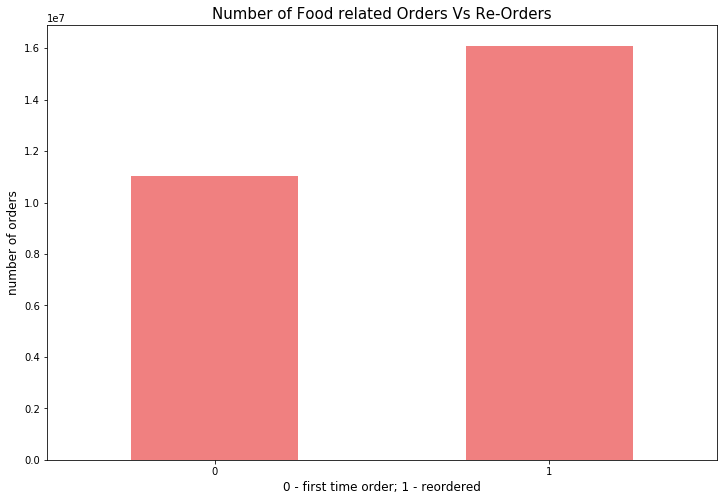

In [26]:
# Graph to show number of Food related Orders Vs Re-Orders
food_related_orders_df.groupby(by='reordered')['reordered'].count().plot(kind = 'bar',rot=0,color='lightcoral',figsize=(12,8))                                                                        
plt.xlabel('0 - first time order; 1 - reordered',fontsize=12)
plt.ylabel('number of orders',fontsize=12)
plt.title('Number of Food related Orders Vs Re-Orders', fontsize=15)
plt.show();

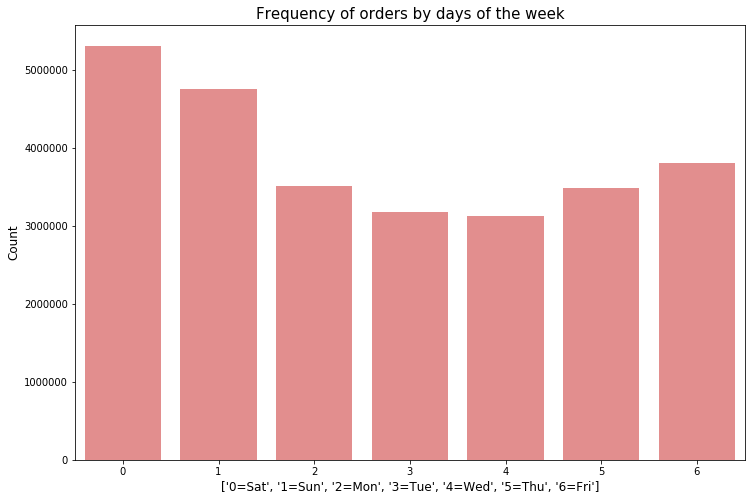

In [27]:
# Frequency of orders by days of the week
food_related_orders_df.groupby(by = 'order_dow')['order_dow'].count()
days_of_the_week=['0=Sat', '1=Sun', '2=Mon', '3=Tue', '4=Wed', '5=Thu', '6=Fri']
plt.figure(figsize=(12,8))
sns.countplot(x='order_dow', data=food_related_orders_df,color='lightcoral')
plt.ylabel('Count', fontsize=12)
plt.xlabel(days_of_the_week,fontsize=12)
plt.xticks(rotation='horizontal')
plt.title("Frequency of orders by days of the week", fontsize=15)
plt.show();

#### from the above graph you can notice that the maximum number of Instacart Orders were placed during weekends (Saturday and Sunday) ; with the least number of orders placed during Tuesday and Wednesday

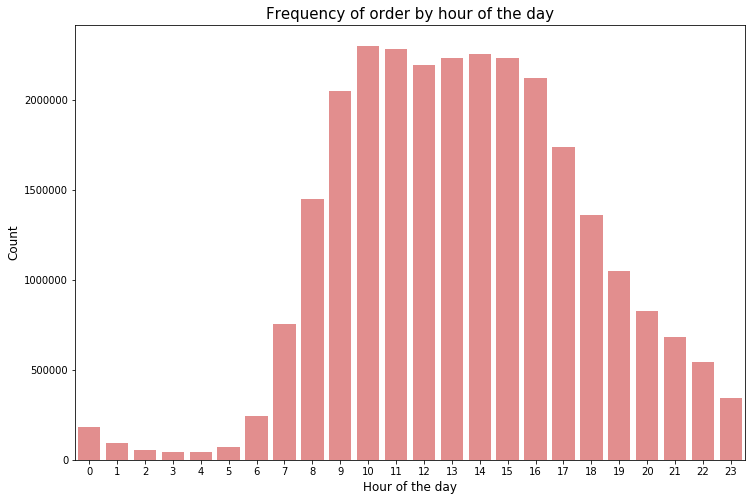

In [28]:
food_related_orders_df.groupby(by = 'order_hour_of_day')['order_hour_of_day'].count()
plt.figure(figsize=(12,8))
sns.countplot(x="order_hour_of_day", data=food_related_orders_df, color='lightcoral')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of the day', fontsize=12)
plt.xticks(rotation='horizontal')
plt.title("Frequency of order by hour of the day", fontsize=15)
plt.show();

#### from the above graph, we can notice that the Instacart Orders were peak during 8 AM to 6 PM, with the maximum number of orders at 10 AM, 11 AM , 2 PM and 3 PM

In [29]:
food_related_orders_df.groupby(by = 'order_hour_of_day')['order_hour_of_day'].count()

order_hour_of_day
0      184238
1       96041
2       57096
3       42012
4       43498
5       73172
6      245136
7      755275
8     1449111
9     2048046
10    2299966
11    2283881
12    2193331
13    2229756
14    2254813
15    2232703
16    2122963
17    1739754
18    1359802
19    1046737
20     823993
21     681899
22     544619
23     342624
Name: order_hour_of_day, dtype: int64

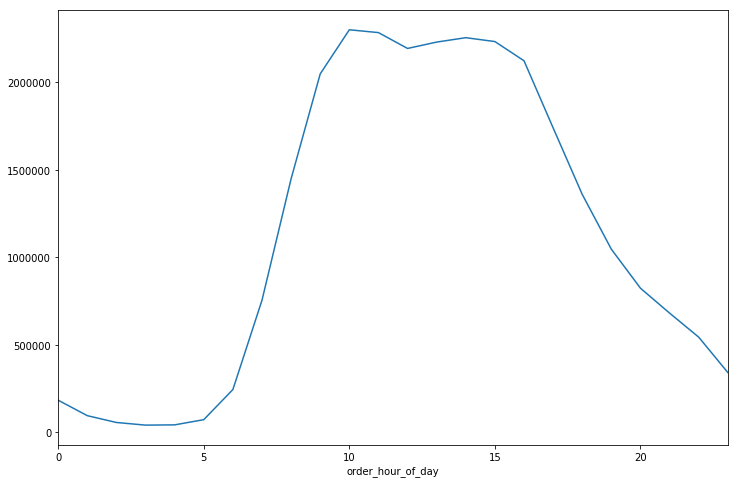

In [30]:
plt.figure(figsize=(12,8))
plt.rcParams['agg.path.chunksize'] = 10000
food_related_orders_df.groupby(by = 'order_hour_of_day')['order_hour_of_day'].count().plot(style='-', x='order_hour_of_day')
plt.show();

In [31]:
# Top 10 food products that were ordered the most
food_related_orders_df['product_name'].value_counts().sort_values(ascending=False).head(10)

Banana                    472565
Bag of Organic Bananas    379450
Organic Strawberries      264683
Organic Baby Spinach      241921
Organic Hass Avocado      213584
Organic Avocado           176815
Large Lemon               152657
Strawberries              142951
Limes                     140627
Organic Whole Milk        137905
Name: product_name, dtype: int64

### Top 10 food products that were ordered the most -- Food orders

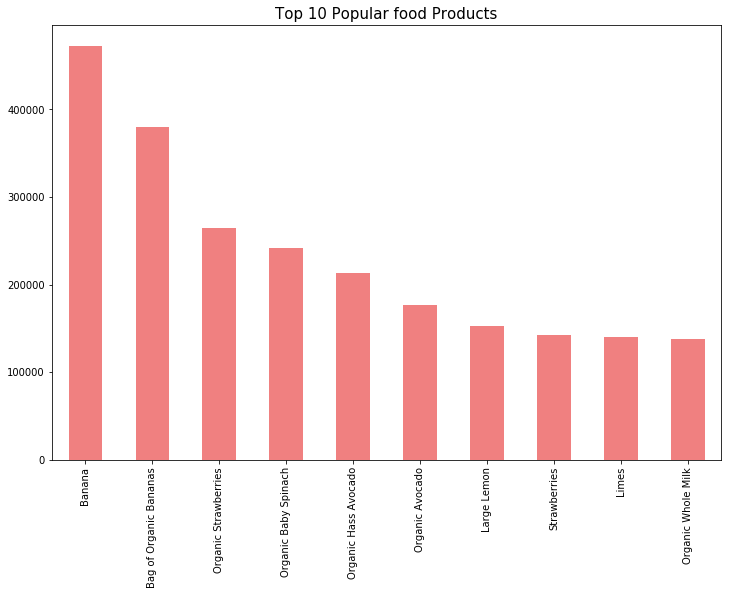

In [32]:
# Top 10 food products that were ordered the most
plt.figure(figsize=(12,8))
top_10_pick=food_related_orders_df['product_name'].value_counts().sort_values(ascending=False).head(10)
top_10_pick.plot(kind="bar", color='lightcoral')
plt.xticks(rotation=90)
plt.title('Top 10 Popular food Products',fontsize=15)
plt.show();

### Top 10 orders in the first time orders -- Food orders

In [33]:
# Top 10 Pick for first time Order
food_related_orders_df[food_related_orders_df['reordered']==0]['product_name'].value_counts().sort_values(ascending=False).head(10)


Banana                    73956
Bag of Organic Bananas    63537
Organic Strawberries      58838
Organic Baby Spinach      55037
Large Lemon               46402
Limes                     44859
Organic Hass Avocado      43453
Strawberries              43149
Organic Avocado           42771
Organic Blueberries       37138
Name: product_name, dtype: int64

### Top 10 orders in the Re-Orders -- Food orders

In [34]:
# Top 10 Pick for Re-Order
food_related_orders_df[food_related_orders_df['reordered']==1]['product_name'].value_counts().sort_values(ascending=False).head(10)


Banana                    398609
Bag of Organic Bananas    315913
Organic Strawberries      205845
Organic Baby Spinach      186884
Organic Hass Avocado      170131
Organic Avocado           134044
Organic Whole Milk        114510
Large Lemon               106255
Organic Raspberries       105409
Strawberries               99802
Name: product_name, dtype: int64

### Top 10 users who ordered the most food products

In [35]:
# Top 10 users who ordered the most
food_related_orders_df['user_id'].value_counts().sort_values(ascending=False).head(10)


201268    2893
33731     2679
182401    2597
164055    2569
108187    2465
129928    2263
60694     2262
176478    2261
13701     2169
79106     2148
Name: user_id, dtype: int64

### Frequency of repetitive orders from the prior order

In [36]:
# frequency of days since prior order
food_related_orders_df['days_since_prior_order'].value_counts().sort_index(ascending = True)

0.0     2098399
1.0      768414
2.0     1216210
3.0     1575525
4.0     1752160
5.0     1795292
6.0     2133622
7.0     2943481
8.0     1632994
9.0     1023537
10.0     809022
11.0     685539
12.0     646318
13.0     712852
14.0     862826
15.0     562296
16.0     384649
17.0     317913
18.0     290357
19.0     278327
20.0     316406
21.0     370553
22.0     257304
23.0     187549
24.0     159836
25.0     149462
26.0     147548
27.0     169231
28.0     210969
29.0     145878
30.0    2545997
Name: days_since_prior_order, dtype: int64

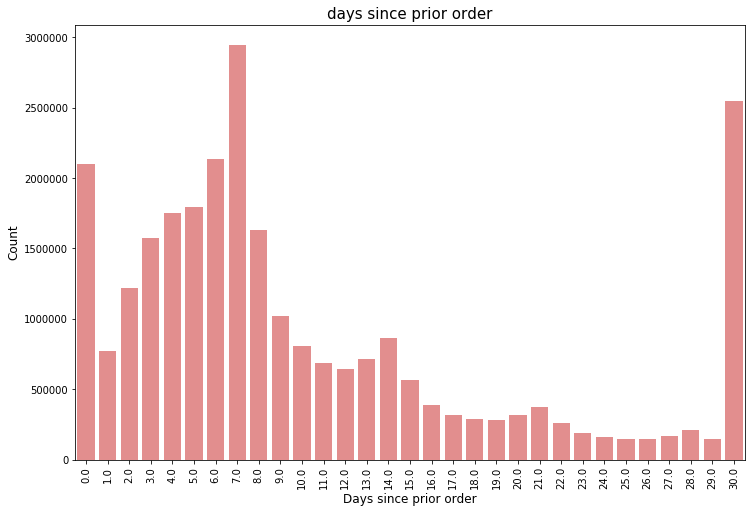

In [37]:
# Frequency of repetitive orders from the prior order
plt.figure(figsize = (12, 8))
sns.countplot(x="days_since_prior_order", data=food_related_orders_df, color = 'lightcoral')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("days since prior order", fontsize=15)
plt.show();

#### from the graph above, the favourite reorder frequencies are 0th day, 7th day and 30th day.

### Separate out Vegetarian foods and Meat for further analysis

In [38]:
#  How many are Vegetarians
vegetarian_orders_df=food_related_orders_df[~((food_related_orders_df['product_name'].str.find('meat')>0)| 
                       (food_related_orders_df['department']=='meat seafood')|
                       (food_related_orders_df['aisle']== 'packaged meat')|
                       (food_related_orders_df['aisle']== 'packaged seafood')|
                       (food_related_orders_df['aisle']== 'frozen meat seafood')|
                       (food_related_orders_df['aisle']== 'seafood counter')|
                       (food_related_orders_df['aisle']== 'canned meat seafood')|
                       (food_related_orders_df['aisle']== 'lunch meat')|
                       (food_related_orders_df['aisle']== 'hot dogs bacon sausage')|
                       (food_related_orders_df['aisle']== 'meat counter'))
                      ]
                           
non_vegetarian_orders_df=food_related_orders_df[((food_related_orders_df['product_name'].str.find('meat')>0)| 
                       (food_related_orders_df['department']=='meat seafood')|
                       (food_related_orders_df['aisle']== 'packaged meat')|
                       (food_related_orders_df['aisle']== 'packaged seafood')|
                       (food_related_orders_df['aisle']== 'frozen meat seafood')|
                       (food_related_orders_df['aisle']== 'seafood counter')|
                       (food_related_orders_df['aisle']== 'canned meat seafood')|
                       (food_related_orders_df['aisle']== 'lunch meat')|
                       (food_related_orders_df['aisle']== 'hot dogs bacon sausage')|
                       (food_related_orders_df['aisle']== 'meat counter'))
                      ]    

In [39]:
print('shape of vegetarian_orders_df = ',vegetarian_orders_df.shape)
print('shape of non_vegetarian_orders_df = ',non_vegetarian_orders_df.shape)
print('Total = ',(vegetarian_orders_df.shape[0]+non_vegetarian_orders_df.shape[0]))
# 27150466

shape of vegetarian_orders_df =  (26297625, 15)
shape of non_vegetarian_orders_df =  (852841, 15)
Total =  27150466


#### find the number of users who ordered only veg food

In [40]:
veg_id = set(vegetarian_orders_df['user_id'])
non_veg_id = set(non_vegetarian_orders_df['user_id'])

# Set of users who ordered both vegetarian food and meat food
veg_non_veg_users=veg_id.intersection(non_veg_id)


# Set of users who ordered only vegetarian food and no meat food
only_veggie_users = veg_id-non_veg_id

In [41]:
# All the unique users - List of Veg and Non Veg users --- 205,096
len(set(vegetarian_orders_df['user_id']))

205096

In [42]:
len(only_veggie_users)

79352

### Total number of users who ordered only Veg food (based on their Orders) - 79352

In [43]:
# Users who ordered both Veg and Meat orders
print('users who orders both vegetarian and meat - ',len(veg_non_veg_users))
print('users who orders only vegetarian and no meat - ',len(only_veggie_users))

users who orders both vegetarian and meat -  125744
users who orders only vegetarian and no meat -  79352


In [44]:
# fuction to display only 5 records from a set
def show_few_records(set_name):
    current_iteration = 0
    max_iterations = 5
    print(("number of items: {}".format(len(set_name))))
    for x in set_name:
        if current_iteration < max_iterations:
            print(x)
        else:
            break
        current_iteration += 1

In [45]:
# display only few records or few values from a set 
show_few_records(veg_non_veg_users)

number of items: 125744
2
6
7
9
10


In [46]:
# Validate Orders related to Meat - By a specific user
non_vegetarian_orders_df[non_vegetarian_orders_df['user_id']==10].head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
17019850,68288,9339,10,0,Organic Chicken & Apple Sausage,106,12,10,prior,2,5,15,30.0,meat seafood,hot dogs bacon sausage
17019851,68288,28986,12,0,Mild Italian Chicken Sausage,106,12,10,prior,2,5,15,30.0,meat seafood,hot dogs bacon sausage
17019849,68288,5646,11,0,Organic Turkey Bacon,106,12,10,prior,2,5,15,30.0,meat seafood,hot dogs bacon sausage


In [47]:
# Validate Orders related to Vegetarian food - By the same specific user

vegetarian_orders_df[vegetarian_orders_df['user_id']==10].head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
14993178,68288,7746,40,0,Oregano,104,13,10,prior,2,5,15,30.0,pantry,spices seasonings
14993180,68288,8988,38,0,Organic Garlic Powder,104,13,10,prior,2,5,15,30.0,pantry,spices seasonings
14993179,68288,35725,42,0,Organic Oregano,104,13,10,prior,2,5,15,30.0,pantry,spices seasonings


In [48]:
# only users who belongs to only_veggie_users 
show_few_records(only_veggie_users)

number of items: 79352
1
131074
3
4
5


In [49]:
vegetarian_orders_df[vegetarian_orders_df['user_id']==3].head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
9091960,444309,21903,2,1,Organic Baby Spinach,123,4,3,prior,2,3,19,9.0,produce,packaged vegetables fruits
577666,444309,17668,6,1,Unsweetened Chocolate Almond Breeze Almond Milk,91,16,3,prior,2,3,19,9.0,dairy eggs,soy lactosefree
22448700,444309,32402,9,1,"Crackers, Crispy, Cheddar",78,19,3,prior,2,3,19,9.0,snacks,crackers


In [50]:
# User who has been identified as vegetarian user; check for the user in non-vegetarian df and should not be present;
non_vegetarian_orders_df[non_vegetarian_orders_df['user_id']==3] 

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle


In [51]:
# Orders from users who we identified as Vegetarian users
# Orders from only_veggie_users
only_vegetarian_df=vegetarian_orders_df[vegetarian_orders_df['user_id'].isin(only_veggie_users)]
only_vegetarian_df.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
25935941,4,21351,6,1,Nutri-Grain Soft Baked Strawberry Cereal Break...,48,14,178520,prior,36,1,9,7.0,breakfast,breakfast bars pastries
22482283,4,17616,10,1,Goldfish Cheddar Baked Snack Crackers,78,19,178520,prior,36,1,9,7.0,snacks,crackers
23128877,4,39758,3,1,Chewy 25% Low Sugar Chocolate Chip Granola,3,19,178520,prior,36,1,9,7.0,snacks,energy granola bars


In [52]:
# Number of unique Vegetarian products in the only_vegetarian_df
only_vegetarian_df['product_name'].nunique()

27260

### Top 20 products ordered from users who we identified as Vegetarian users

In [53]:
# Top products ordered from users who we identified as only Vegetarian users
only_vegetarian_df['product_name'].value_counts().sort_values(ascending=False).head(20)

Banana                    107350
Bag of Organic Bananas     96137
Organic Strawberries       48070
Organic Baby Spinach       47362
Organic Hass Avocado       42442
Strawberries               33272
Organic Avocado            29762
Organic Raspberries        27961
Large Lemon                26765
Organic Fuji Apple         26148
Organic Half & Half        26101
Organic Whole Milk         25405
Organic Blueberries        24304
Limes                      23124
Half & Half                22147
Raspberries                19155
Clementines                18886
Organic Lemon              18653
Seedless Red Grapes        17921
Organic Baby Carrots       17564
Name: product_name, dtype: int64

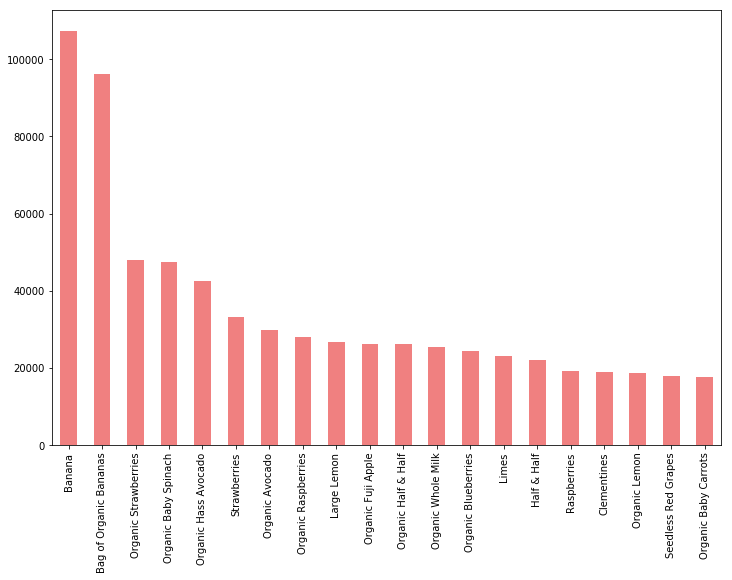

In [54]:
only_vegetarian_df['product_name'].value_counts().sort_values(ascending=False).head(20).plot(kind='bar',
                                                                                             figsize=(12,8),
                                                                                             color='lightcoral')


### Top 20 products Vegetarian users ordered in their weekly reorders

In [55]:
only_vegetarian_df[only_vegetarian_df['days_since_prior_order']==7]['product_name'].value_counts().sort_values(ascending=False).head(20)


Banana                                  15258
Bag of Organic Bananas                  11823
Organic Strawberries                     5321
Organic Baby Spinach                     4615
Organic Hass Avocado                     4613
Organic Fuji Apple                       4563
Organic Half & Half                      4172
Strawberries                             4064
Half & Half                              3740
Clementines                              3257
Organic Raspberries                      3226
Large Lemon                              3035
Organic Avocado                          2997
Organic Whole Milk                       2958
Organic Blueberries                      2626
Organic Gala Apples                      2600
Organic Large Extra Fancy Fuji Apple     2484
Seedless Red Grapes                      2480
Honeycrisp Apple                         2416
Apple Honeycrisp Organic                 2408
Name: product_name, dtype: int64

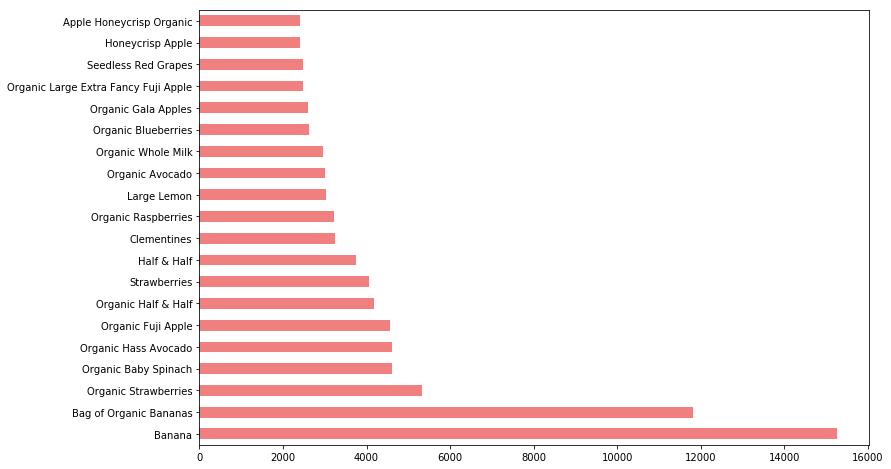

In [56]:
only_vegetarian_df[only_vegetarian_df['days_since_prior_order']==7]['product_name'].value_counts(ascending=False).head(20).plot(kind='barh',
                                                                                                                                figsize=(12,8),
                                                                                                                                color = 'lightcoral')


### Top 20 products which were added to users shopping cart first (first item added to the cart) in their re-orders

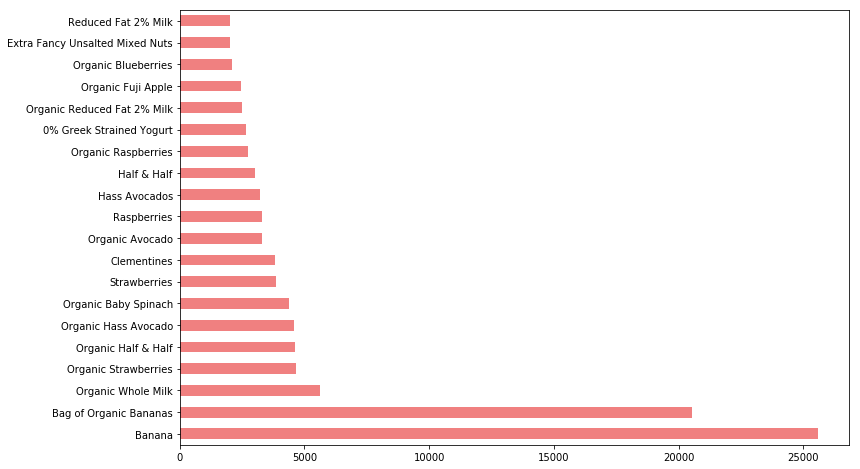

In [57]:
only_vegetarian_df[((only_vegetarian_df['reordered']==1)
                   &(only_vegetarian_df['add_to_cart_order']==1))]['product_name'].value_counts(ascending=False).head(20).plot(kind='barh',
                                                                                                                               figsize=(12,8),
                                                                                                                               color='lightcoral')


In [58]:
# # Store the data into a CSV for further use
# Commenting this portion as the csv generated is of bulk size 597MB
# only_vegetarian_df.to_csv('./InstaCart_OnlyVegetarian_foods.csv')

In [59]:
only_vegetarian_df.shape

(5647220, 15)

In [60]:
only_vegetarian_df.head(3)

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
25935941,4,21351,6,1,Nutri-Grain Soft Baked Strawberry Cereal Break...,48,14,178520,prior,36,1,9,7.0,breakfast,breakfast bars pastries
22482283,4,17616,10,1,Goldfish Cheddar Baked Snack Crackers,78,19,178520,prior,36,1,9,7.0,snacks,crackers
23128877,4,39758,3,1,Chewy 25% Low Sugar Chocolate Chip Granola,3,19,178520,prior,36,1,9,7.0,snacks,energy granola bars


In [61]:
# Read the food and nutrition Customized dataframes from USDA
food_data_df=pd.read_csv('./prepared_data/food_descr.csv',index_col = 'Unnamed: 0')
nutr_data_df = pd.read_csv('./prepared_data/nutr_descr.csv',index_col = 'Unnamed: 0')

/Users/kkesari/anaconda3/envs/dsi/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [62]:
print("food_data_df.shape", food_data_df.shape)
print("nutr_data_df.shape", nutr_data_df.shape)

food_data_df.shape (7793, 15)
nutr_data_df.shape (644125, 22)


### Create a new data frame and exclude some of the below food groups and foods; restrict the DF to limited fresh food items only.

In [63]:
#  Create a new dataframe and exclude some of the below food groups and foods 
#  restrict the DF to limited fresh food items only.
usda_food_df = food_data_df[~(
                       (food_data_df['FdGrp_Desc']== 'Beef Products')|
                       (food_data_df['FdGrp_Desc']== 'Baby Foods')|
                       (food_data_df['FdGrp_Desc']== 'Soups, Sauces, and Gravies')|
                       (food_data_df['FdGrp_Desc']== 'Beverages')|
                       (food_data_df['FdGrp_Desc']== 'Pork Products')|
                       (food_data_df['FdGrp_Desc']== 'Finfish and Shellfish Products')|
                       (food_data_df['FdGrp_Desc']== 'Sausages and Luncheon Meats')|
                       (food_data_df['FdGrp_Desc']== 'Restaurant Foods')|
                       (food_data_df['FdGrp_Desc']== 'Fats and Oils')|
                       (food_data_df['FdGrp_Desc']== 'Cereal Grains and Pasta')|    
                       (food_data_df['Long_Desc'].str.find('meat')>0)|
                       (food_data_df['Long_Desc'].str.find('prepared')>0)|
                       (food_data_df['Long_Desc'].str.find('juice')>0)|
                       (food_data_df['Long_Desc'].str.find('jam')>0)|
                       (food_data_df['Long_Desc'].str.find('pudding')>0)|
                       (food_data_df['Long_Desc'].str.find('instant')>0)| 
                       (food_data_df['Long_Desc'].str.find('smoothie')>0) 
                       )]

In [64]:
usda_food_df.shape

(3686, 15)

In [65]:
# further exclude some of the prepare or instant food items from USDA food list
exclude=['juice', 'Juice', 'prepared', 'instant', 'Instant', 'cooked', 'boiled', 'microwave', 'canned', 'dehydrated', 'stewed', 'unheated']
pattern = '|'.join(exclude)
usda_fresh_veg_food=usda_food_df.loc[~(usda_food_df['Long_Desc'].str.contains(pattern, case=False))]

In [66]:
# Shape of the usda_fresh_veg_food after eliminating the foods mentioned above
usda_fresh_veg_food.shape

(2640, 15)

In [67]:
# nutrition data frame
nutr_data_df.shape

(644125, 22)

#### Identify only certain Nutrients (listed in pattern below) and their units

In [68]:
# Identify only certain Nutrients (listed in pattern) and their units 
# Create a new DF with the specific columns
pattern=['208','203','204','255','307','269','291','301','303','601','605','606','645','646']
new_nutr_df=nutr_data_df[ (nutr_data_df['Nutr_No'].isin(pattern) )][['NDB_No','Nutr_No', 'Nutr_Val','Units','Tagname','NutrDesc']]
new_nutr_df['NutrDescInUnits'] = new_nutr_df['NutrDesc'].str.cat(" ("+new_nutr_df['Units']+")")


In [69]:
# nutrition data frame shape after including specific nutrients
new_nutr_df.shape

(101119, 7)

In [70]:
# value counts of specific nutrients from nutrition data frame
new_nutr_df['Nutr_No'].value_counts()

255    7793
208    7793
204    7793
203    7793
303    7713
307    7709
301    7708
606    7450
601    7394
646    7279
645    7277
291    7231
269    6007
605    4179
Name: Nutr_No, dtype: int64

In [71]:
new_nutr_df.head(3)

,NDB_No,Nutr_No,Nutr_Val,Units,Tagname,NutrDesc,NutrDescInUnits
0,1001,208,717.0,kcal,ENERC_KCAL,Energy,Energy (kcal)
4,1001,301,24.0,mg,CA,"Calcium, Ca","Calcium, Ca (mg)"
8,1001,307,643.0,mg,NaN,"Sodium, Na","Sodium, Na (mg)"


In [72]:
# Using the Pivot functionality, change the colums and rows, display nutrient information for each NDB_No.
new_nutr_piv_df=new_nutr_df.pivot(index = 'NDB_No', columns = 'NutrDescInUnits', values = 'Nutr_Val')

In [73]:
new_nutr_piv_df.head(3)

NutrDescInUnits,"Calcium, Ca (mg)",Cholesterol (mg),Energy (kcal),"Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)","Fatty acids, total saturated (g)","Fatty acids, total trans (g)","Fiber, total dietary (g)","Iron, Fe (mg)",Protein (g),"Sodium, Na (mg)","Sugars, total (g)",Total lipid (fat) (g),Water (g)
NDB_No,,,,,,,,,,,,,,
1001,24.0,215.0,717.0,21.021,3.043,51.368,3.278,0.0,0.02,0.85,643.0,0.06,81.11,16.17
1002,23.0,225.0,731.0,19.874,3.331,45.390,2.669,0.0,0.05,0.49,583.0,0.06,78.30,16.72
1003,4.0,256.0,876.0,28.732,3.694,61.924,NaN,0.0,0.00,0.28,2.0,0.00,99.48,0.24


In [74]:
# create an empty dataframe, with the intention to append data later on.
#  This dataframe would contain the USDA NDB_No, Long Description of food and also the InstaCart's Product_ID and Product Name
columns =['NDB_No','Long_Desc','product_id','product_name' ]
usda_insta_df=pd.DataFrame(columns = columns)
usda_insta_df.head()



,NDB_No,Long_Desc,product_id,product_name


In [75]:
# Review the shape of the InstaCart's veg foods dataframe
only_vegetarian_df.shape
    

(5647220, 15)

In [76]:
# Number of columns from the InstaCart's Veg foods dataframe
only_vegetarian_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'department', 'aisle'], dtype='object')

In [77]:
# get distinct product_id and product_name values from the only_vegetarian_df (from instacart data)
veg_prod_unique_df = only_vegetarian_df[['product_id','product_name']]

In [78]:
veg_prod_unique_df.shape

(5647220, 2)

In [79]:
# to get the distinct product_id and product_name, drop duplicates
veg_prod_unique_df=veg_prod_unique_df.drop_duplicates()
veg_prod_unique_df.shape

(27260, 2)

In [80]:
veg_prod_unique_df.head(3)

,product_id,product_name
25935941,21351,Nutri-Grain Soft Baked Strawberry Cereal Break...
22482283,17616,Goldfish Cheddar Baked Snack Crackers
23128877,39758,Chewy 25% Low Sugar Chocolate Chip Granola


In [81]:
veg_prod_unique_df[veg_prod_unique_df['product_name'].str.find('Banana')>0]['product_name'].str.upper().head()

10631045                               BAG OF ORGANIC BANANAS
31945715                     BABY FOOD STAGE 2 PUMPKIN BANANA
14042081                                       ORGANIC BANANA
25084873                     GRANOLA, CLUSTERS, BANANA WALNUT
18280237    GLUTEN FREE DARK CHOCOLATE COVERED CREAMY BANA...
Name: product_name, dtype: object

In [82]:
# further exclude some of the prepare or instant food items from Instacart's food list
exclude=['juice', 'Juice', 'Cereal','prepared', 'instant', 'Instant', 'cooked', 'boiled', 'microwave', 'canned', 'dehydrated', 'stewed', 'unheated']
pattern = '|'.join(exclude)
veg_prod_unique_df=veg_prod_unique_df.loc[~(veg_prod_unique_df['product_name'].str.contains(pattern, case=False))]


In [83]:
# review the shape of veg_prod_unique_df after exclusion
veg_prod_unique_df.shape

(26430, 2)

In [84]:
# Shape of the usda_fresh_veg_food after eliminating the foods mentioned above
usda_fresh_veg_food.shape

(2640, 15)

### Loop through customized USDA Food data and InstaCart's food data and match food items using string match 

In [85]:
# Create a new dataframe with NDB_No, Long_Desc, product_id and product_name using Fuzzy Match
# This results in a dataframe that contains instacart product mapped to USDA NDB_No.

for prod,prod_row in enumerate(veg_prod_unique_df.itertuples(),1):
    for food,food_row in enumerate(usda_fresh_veg_food.itertuples(),1):
        if (fuzz.token_sort_ratio(food_row.Long_Desc.upper(), prod_row.product_name.upper()))>90:
#             print(food_row.NDB_No,  food_row.Long_Desc, prod_row.product_id, prod_row.product_name)
            usda_insta_df = usda_insta_df.append(
                            pd.DataFrame({'NDB_No':food_row.NDB_No, 
                                          'Long_Desc': food_row.Long_Desc,
                                          'product_id': prod_row.product_id,
                                          'product_name': prod_row.product_name
                                         } , index=[0]), ignore_index=True)

            
usda_insta_df.head()

,NDB_No,Long_Desc,product_id,product_name
0,1119,"Yogurt, vanilla, low fat.",30442,Low Fat Vanilla Yogurt
1,1295,"Yogurt, vanilla, non-fat",30442,Low Fat Vanilla Yogurt
2,1179,"Sour cream, light",26172,Light Sour Cream
3,1001,"Butter, salted",42736,Unsalted Butter
4,19335,"Sugars, granulated",26152,Granulated Sugar


#### This resulting data frame has Instacart's Product names listed with the respective NDB Numbers from USDA

In [86]:
usda_insta_df.shape

(173, 4)

In [87]:
usda_insta_df.head(10)

,NDB_No,Long_Desc,product_id,product_name
0,1119,"Yogurt, vanilla, low fat.",30442,Low Fat Vanilla Yogurt
1,1295,"Yogurt, vanilla, non-fat",30442,Low Fat Vanilla Yogurt
2,1179,"Sour cream, light",26172,Light Sour Cream
3,1001,"Butter, salted",42736,Unsalted Butter
4,19335,"Sugars, granulated",26152,Granulated Sugar
5,11658,Spinach souffle,29116,Spinach Souffle
6,19296,Honey,49588,Honey
7,1146,"Cheese, parmesan, shredded",25919,Parmesan Shredded Cheese
8,1117,"Yogurt, plain, low fat",7054,Low Fat Plain Yogurt
9,18349,"Rolls, french",517,French Rolls


#### 'butter,salted' and 'butter, unsalted' fuzzy string match could not differentiate.

In [88]:
new_nutr_piv_df.head()

NutrDescInUnits,"Calcium, Ca (mg)",Cholesterol (mg),Energy (kcal),"Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)","Fatty acids, total saturated (g)","Fatty acids, total trans (g)","Fiber, total dietary (g)","Iron, Fe (mg)",Protein (g),"Sodium, Na (mg)","Sugars, total (g)",Total lipid (fat) (g),Water (g)
NDB_No,,,,,,,,,,,,,,
1001,24.0,215.0,717.0,21.021,3.043,51.368,3.278,0.0,0.02,0.85,643.0,0.06,81.11,16.17
1002,23.0,225.0,731.0,19.874,3.331,45.390,2.669,0.0,0.05,0.49,583.0,0.06,78.30,16.72
1003,4.0,256.0,876.0,28.732,3.694,61.924,NaN,0.0,0.00,0.28,2.0,0.00,99.48,0.24
1004,528.0,75.0,353.0,7.778,0.800,18.669,NaN,0.0,0.31,21.40,1146.0,0.50,28.74,42.41
1005,674.0,94.0,371.0,8.598,0.784,18.764,NaN,0.0,0.43,23.24,560.0,0.51,29.68,41.11


In [89]:
# using loc
# nutrient information for a specific NDB number--> 1001
new_nutr_piv_df.loc[1001]

NutrDescInUnits
Calcium, Ca (mg)                           24.000
Cholesterol (mg)                          215.000
Energy (kcal)                             717.000
Fatty acids, total monounsaturated (g)     21.021
Fatty acids, total polyunsaturated (g)      3.043
Fatty acids, total saturated (g)           51.368
Fatty acids, total trans (g)                3.278
Fiber, total dietary (g)                    0.000
Iron, Fe (mg)                               0.020
Protein (g)                                 0.850
Sodium, Na (mg)                           643.000
Sugars, total (g)                           0.060
Total lipid (fat) (g)                      81.110
Water (g)                                  16.170
Name: 1001, dtype: float64

In [90]:
# using iloc
new_nutr_piv_df.iloc[0]

NutrDescInUnits
Calcium, Ca (mg)                           24.000
Cholesterol (mg)                          215.000
Energy (kcal)                             717.000
Fatty acids, total monounsaturated (g)     21.021
Fatty acids, total polyunsaturated (g)      3.043
Fatty acids, total saturated (g)           51.368
Fatty acids, total trans (g)                3.278
Fiber, total dietary (g)                    0.000
Iron, Fe (mg)                               0.020
Protein (g)                                 0.850
Sodium, Na (mg)                           643.000
Sugars, total (g)                           0.060
Total lipid (fat) (g)                      81.110
Water (g)                                  16.170
Name: 1001, dtype: float64

In [91]:
# 19271	Ice creams, strawberry	40002	Strawberry Ice Cream
new_nutr_piv_df.loc[19271]


NutrDescInUnits
Calcium, Ca (mg)                          120.00
Cholesterol (mg)                           29.00
Energy (kcal)                             192.00
Fatty acids, total monounsaturated (g)       NaN
Fatty acids, total polyunsaturated (g)       NaN
Fatty acids, total saturated (g)            5.19
Fatty acids, total trans (g)                 NaN
Fiber, total dietary (g)                    0.90
Iron, Fe (mg)                               0.21
Protein (g)                                 3.20
Sodium, Na (mg)                            60.00
Sugars, total (g)                            NaN
Total lipid (fat) (g)                       8.40
Water (g)                                  60.00
Name: 19271, dtype: float64

In [92]:
# merging instacart's product information and USDA's nutrient information
usda_instacart_nutr_df = (usda_insta_df 
                                .merge(new_nutr_piv_df, on="NDB_No"))

In [93]:
usda_instacart_nutr_df.shape

(173, 18)

In [94]:
# find duplicates
usda_instacart_nutr_df[usda_instacart_nutr_df.duplicated()].head()

,NDB_No,Long_Desc,product_id,product_name,"Calcium, Ca (mg)",Cholesterol (mg),Energy (kcal),"Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)","Fatty acids, total saturated (g)","Fatty acids, total trans (g)","Fiber, total dietary (g)","Iron, Fe (mg)",Protein (g),"Sodium, Na (mg)","Sugars, total (g)",Total lipid (fat) (g),Water (g)


In [95]:
#  drop duplicates
usda_instacart_nutr_df=usda_instacart_nutr_df.drop_duplicates()

In [96]:
# review the shape after dropping duplicates
usda_instacart_nutr_df.shape

(173, 18)

In [97]:
usda_instacart_nutr_df.head()

,NDB_No,Long_Desc,product_id,product_name,"Calcium, Ca (mg)",Cholesterol (mg),Energy (kcal),"Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)","Fatty acids, total saturated (g)","Fatty acids, total trans (g)","Fiber, total dietary (g)","Iron, Fe (mg)",Protein (g),"Sodium, Na (mg)","Sugars, total (g)",Total lipid (fat) (g),Water (g)
0,1119,"Yogurt, vanilla, low fat.",30442,Low Fat Vanilla Yogurt,171.0,5.0,85.0,0.343,0.036,0.806,NaN,0.0,0.07,4.93,66.0,13.80,1.25,79.0
1,1119,"Yogurt, vanilla, low fat.",21387,Non-Fat Vanilla Yogurt,171.0,5.0,85.0,0.343,0.036,0.806,NaN,0.0,0.07,4.93,66.0,13.80,1.25,79.0
2,1295,"Yogurt, vanilla, non-fat",30442,Low Fat Vanilla Yogurt,118.0,3.0,78.0,0.000,0.000,0.000,NaN,0.0,0.00,2.94,47.0,5.88,0.00,79.0
3,1295,"Yogurt, vanilla, non-fat",21387,Non-Fat Vanilla Yogurt,118.0,3.0,78.0,0.000,0.000,0.000,NaN,0.0,0.00,2.94,47.0,5.88,0.00,79.0
4,1179,"Sour cream, light",26172,Light Sour Cream,141.0,35.0,136.0,3.100,0.400,6.600,NaN,0.0,0.07,3.50,83.0,0.22,10.60,78.1


In [98]:
# Instacart DF with Veg. Food
only_vegetarian_df.shape

(5647220, 15)

In [99]:
only_vegetarian_df.columns

Index(['order_id', 'product_id', 'add_to_cart_order', 'reordered', 'product_name', 'aisle_id', 'department_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'department', 'aisle'], dtype='object')

In [100]:
# merging Instacart's previous orders with usda food and nutrition dataframe resulting in
# new data frame with order_id, product_id, ndb_no. with nutrient information
usda_instacart_final_df = (usda_instacart_nutr_df
                                .merge(only_vegetarian_df, on=["product_id","product_name"])                           
                        )

In [101]:
# 47877 rows after merge (previous orders + usda nutrient info)
usda_instacart_final_df.shape

(47877, 31)

In [102]:
usda_instacart_final_df.sample(5)

,NDB_No,Long_Desc,product_id,product_name,"Calcium, Ca (mg)",Cholesterol (mg),Energy (kcal),"Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)","Fatty acids, total saturated (g)","Fatty acids, total trans (g)","Fiber, total dietary (g)","Iron, Fe (mg)",Protein (g),"Sodium, Na (mg)","Sugars, total (g)",Total lipid (fat) (g),Water (g),order_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
6803,1001,"Butter, salted",42736,Unsalted Butter,24.0,215.0,717.0,21.021,3.043,51.368,3.278,0.0,0.02,0.85,643.0,0.06,81.11,16.17,2392038,8,1,36,16,69447,prior,38,0,19,7.0,dairy eggs,butter
30149,18266,"Muffins, English, whole-wheat",31371,Whole Wheat English Muffins,265.0,0.0,203.0,0.513,0.835,0.334,NaN,6.7,2.45,8.80,364.0,8.09,2.10,45.70,572673,12,1,93,3,187007,prior,30,4,10,9.0,bakery,breakfast bakery
10879,11658,Spinach souffle,29116,Spinach Souffle,165.0,118.0,172.0,3.021,0.610,6.091,0.188,0.7,1.19,7.89,566.0,1.85,12.95,70.73,106472,1,1,38,1,57701,prior,38,1,20,0.0,frozen,frozen meals
13567,1117,"Yogurt, plain, low fat",7054,Low Fat Plain Yogurt,183.0,6.0,63.0,0.426,0.044,1.000,NaN,0.0,0.08,5.25,70.0,7.04,1.55,85.07,1307546,9,1,120,16,148695,prior,21,4,10,7.0,dairy eggs,yogurt
3744,1179,"Sour cream, light",26172,Light Sour Cream,141.0,35.0,136.0,3.100,0.400,6.600,NaN,0.0,0.07,3.50,83.0,0.22,10.60,78.10,3010622,2,1,108,16,92842,prior,19,4,19,6.0,dairy eggs,other creams cheeses


In [103]:
usda_instacart_final_df.shape

(47877, 31)

In [104]:
# Granulated Sugar,Powdered Sugar,Honey, Dark corn syrup, light corn syrup,
# Molasses, Mejdool dates are high in sugars. 
usda_instacart_final_df[(usda_instacart_final_df['product_name']!='Granulated Sugar')
                        &(usda_instacart_final_df['product_name']!='Powdered Sugar')
                        &(usda_instacart_final_df['product_name']!='Honey')
                        &(usda_instacart_final_df['product_name']!='Dark Corn Syrup')
                        &(usda_instacart_final_df['product_name']!='Light Corn Syrup')
                        &(usda_instacart_final_df['product_name']!='Molasses')
                        &(usda_instacart_final_df['product_name']!='Medjool Dates')
                       ][['product_name','Sugars, total (g)']].sort_values(by='Sugars, total (g)'
                                                                           ,ascending=False).sample(5)


,product_name,"Sugars, total (g)"
30795,Whole Wheat English Muffins,8.09
6682,Unsalted Butter,0.06
41688,French Vanilla Soy Creamer,20.00
14712,Fat Free Cream Cheese,5.48
13960,Low Fat Plain Yogurt,7.04


In [105]:
# Maximum Sugars
usda_instacart_final_df[usda_instacart_final_df['Sugars, total (g)']==usda_instacart_final_df['Sugars, total (g)'].max()][['NDB_No','Long_Desc','product_name','Sugars, total (g)']].groupby(by=['NDB_No','Long_Desc','product_name','Sugars, total (g)']).count().sort_values(by='Sugars, total (g)', ascending=False)
                                                                                                                          

,,,
NDB_No,Long_Desc,product_name,"Sugars, total (g)"
19335,"Sugars, granulated",Granulated Sugar,99.8


In [106]:
#  Maximum Protein
usda_instacart_final_df[usda_instacart_final_df['Protein (g)']==usda_instacart_final_df['Protein (g)'].max()][['NDB_No','Long_Desc','product_name','Protein (g)']].groupby(by=['NDB_No','Long_Desc','product_name','Protein (g)']).count().sort_values(by='Protein (g)', ascending=False)
                                                                                                                          

Empty DataFrame
Columns: []
Index: [(1146, Cheese, parmesan, shredded, Cheese, Shredded, Parmesan, 37.86), (1146, Cheese, parmesan, shredded, Parmesan Cheese Shreds, 37.86), (1146, Cheese, parmesan, shredded, Parmesan Shredded Cheese, 37.86), (1146, Cheese, parmesan, shredded, Shredded Parmesan Cheese, 37.86)]

In [107]:
#  Maximum Total Dietary Fiber 
usda_instacart_final_df[usda_instacart_final_df['Fiber, total dietary (g)']==usda_instacart_final_df['Fiber, total dietary (g)'].max()][['NDB_No','Long_Desc','product_name','Fiber, total dietary (g)']].groupby(by=['NDB_No','Long_Desc','product_name','Fiber, total dietary (g)']).count().sort_values(by='Fiber, total dietary (g)', ascending=False)
                                                                                                                          

,,,
NDB_No,Long_Desc,product_name,"Fiber, total dietary (g)"
19165,"Cocoa, dry powder, unsweetened",Unsweetened Cocoa Powder,37.0


In [108]:
#  Minimum amount of Sugars 
usda_instacart_final_df[usda_instacart_final_df['Sugars, total (g)']==usda_instacart_final_df['Sugars, total (g)'].min()][['NDB_No','Long_Desc','product_name','Sugars, total (g)']].groupby(by=['NDB_No','Long_Desc','product_name','Sugars, total (g)']).count().sort_values(by='Sugars, total (g)', ascending=False)
                                                                                                        

Empty DataFrame
Columns: []
Index: [(1019, Cheese, feta, Feta Cheese, 0.0), (1026, Cheese, mozzarella, whole milk, Whole Milk Mozzarella Cheese, 0.0), (1040, Cheese, swiss, Swiss Cheese, 0.0), (1251, Cheese, Mexican blend, Mexican 4 Cheese Blend, 0.0), (1251, Cheese, Mexican blend, Mexican Blend Cheese, 0.0), (2047, Salt, table, Table Salt, 0.0), (2068, Vinegar, red wine, Red Wine Vinegar, 0.0), (2068, Vinegar, red wine, Vinegar, Red Wine, 0.0), (21421, KFC, Crispy Chicken Strips, Crispy Chicken Strips, 0.0)]

In [109]:
#  Maximum amount of Fatty acids, total saturated (g) 
usda_instacart_final_df[usda_instacart_final_df['Fatty acids, total saturated (g)']==usda_instacart_final_df['Fatty acids, total saturated (g)'].max()][['NDB_No','Long_Desc','product_name','Fatty acids, total saturated (g)']].groupby(by=['NDB_No','Long_Desc','product_name','Fatty acids, total saturated (g)']).count().sort_values(by='Fatty acids, total saturated (g)', ascending=False)
                                                                                                        

Empty DataFrame
Columns: []
Index: [(1001, Butter, salted, Butter Salted, 51.368), (1001, Butter, salted, Salted Butter, 51.368), (1001, Butter, salted, Unsalted Butter, 51.368)]

In [110]:
#  Maximum amount of Cholesterol (mg) 
usda_instacart_final_df[usda_instacart_final_df['Cholesterol (mg)']==usda_instacart_final_df['Cholesterol (mg)'].max()][['NDB_No','Long_Desc','product_name','Cholesterol (mg)']].groupby(by=['NDB_No','Long_Desc','product_name','Cholesterol (mg)']).count().sort_values(by='Cholesterol (mg)', ascending=False)
                                                                                                        

Empty DataFrame
Columns: []
Index: [(1001, Butter, salted, Butter Salted, 215.0), (1001, Butter, salted, Salted Butter, 215.0), (1001, Butter, salted, Unsalted Butter, 215.0)]

In [111]:
#  Maximum amount of Fatty acids, total trans (g)
usda_instacart_final_df[usda_instacart_final_df['Fatty acids, total trans (g)']==usda_instacart_final_df['Fatty acids, total trans (g)'].max()][['NDB_No','Long_Desc','product_name','Fatty acids, total trans (g)']].groupby(by=['NDB_No','Long_Desc','product_name','Fatty acids, total trans (g)']).count().sort_values(by='Fatty acids, total trans (g)', ascending=False)
                                                                                                        

Empty DataFrame
Columns: []
Index: [(1001, Butter, salted, Butter Salted, 3.278), (1001, Butter, salted, Salted Butter, 3.278), (1001, Butter, salted, Unsalted Butter, 3.278)]

In [112]:
# Top foods with Total Dietary Fiber 
usda_instacart_final_df[['NDB_No','Long_Desc','product_name','Fiber, total dietary (g)']].groupby(by=['NDB_No','Long_Desc','product_name','Fiber, total dietary (g)']).count().sort_values(by='Fiber, total dietary (g)', ascending=False).head(5)

Empty DataFrame
Columns: []
Index: [(19165, Cocoa, dry powder, unsweetened, Unsweetened Cocoa Powder, 37.0), (11615, Chives, freeze-dried, Freeze Dried Chives, 26.2), (11615, Chives, freeze-dried, Freeze-Dried Chives, 26.2), (2049, Thyme, fresh, Fresh Thyme, 14.0), (2075, Seasoning mix, dry, taco, original, Original Taco Seasoning Mix, 13.3)]

In [113]:
usda_instacart_final_df.shape

(47877, 31)

In [114]:
usda_instacart_final_df.head(3)

,NDB_No,Long_Desc,product_id,product_name,"Calcium, Ca (mg)",Cholesterol (mg),Energy (kcal),"Fatty acids, total monounsaturated (g)","Fatty acids, total polyunsaturated (g)","Fatty acids, total saturated (g)","Fatty acids, total trans (g)","Fiber, total dietary (g)","Iron, Fe (mg)",Protein (g),"Sodium, Na (mg)","Sugars, total (g)",Total lipid (fat) (g),Water (g),order_id,add_to_cart_order,reordered,aisle_id,department_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,department,aisle
0,1119,"Yogurt, vanilla, low fat.",30442,Low Fat Vanilla Yogurt,171.0,5.0,85.0,0.343,0.036,0.806,NaN,0.0,0.07,4.93,66.0,13.8,1.25,79.0,27,2,1,120,16,129389,prior,16,6,20,14.0,dairy eggs,yogurt
1,1119,"Yogurt, vanilla, low fat.",30442,Low Fat Vanilla Yogurt,171.0,5.0,85.0,0.343,0.036,0.806,NaN,0.0,0.07,4.93,66.0,13.8,1.25,79.0,3024,1,0,120,16,56367,prior,17,3,13,19.0,dairy eggs,yogurt
2,1119,"Yogurt, vanilla, low fat.",30442,Low Fat Vanilla Yogurt,171.0,5.0,85.0,0.343,0.036,0.806,NaN,0.0,0.07,4.93,66.0,13.8,1.25,79.0,4966,1,0,120,16,164868,prior,1,2,14,0.0,dairy eggs,yogurt


In [115]:
#  check the nulls
usda_instacart_final_df.isnull().sum()

NDB_No                                        0
Long_Desc                                     0
product_id                                    0
product_name                                  0
Calcium, Ca (mg)                              0
Cholesterol (mg)                            979
Energy (kcal)                                 0
Fatty acids, total monounsaturated (g)     4061
Fatty acids, total polyunsaturated (g)     3993
Fatty acids, total saturated (g)            291
Fatty acids, total trans (g)              28392
Fiber, total dietary (g)                    823
Iron, Fe (mg)                                 0
Protein (g)                                   0
Sodium, Na (mg)                               0
Sugars, total (g)                          1698
Total lipid (fat) (g)                         0
Water (g)                                     0
order_id                                      0
add_to_cart_order                             0
reordered                               

In [116]:
# fill the NaN s with '0', whereever the nutrient information is not given
usda_instacart_final_df.fillna(0, inplace=True)

In [117]:
usda_instacart_final_df.isnull().sum().sum()

0

In [118]:
usda_instacart_final_df.columns

Index(['NDB_No', 'Long_Desc', 'product_id', 'product_name', 'Calcium, Ca (mg)', 'Cholesterol (mg)', 'Energy (kcal)', 'Fatty acids, total monounsaturated (g)', 'Fatty acids, total polyunsaturated (g)', 'Fatty acids, total saturated (g)', 'Fatty acids, total trans (g)', 'Fiber, total dietary (g)', 'Iron, Fe (mg)', 'Protein (g)', 'Sodium, Na (mg)', 'Sugars, total (g)', 'Total lipid (fat) (g)', 'Water (g)', 'order_id', 'add_to_cart_order', 'reordered', 'aisle_id', 'department_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order', 'department', 'aisle'], dtype='object')

In [119]:
# store into csv
usda_instacart_final_df.to_csv('./prepared_data/USDA_Insta_Final_Data.csv')